# Upper Confidence Bound

This notebook includes: 
* Applying Upper Confidence Bound to optimize ad click through rate
* Visualizing Upper Confidence Bound selections

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [4]:
# Import dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
# Explore dataset
print(dataset.shape)
print(dataset.describe())
dataset.head(10)

(10000, 10)
               Ad 1          Ad 2          Ad 3          Ad 4          Ad 5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.170300      0.129500      0.072800      0.119600      0.269500   
std        0.375915      0.335769      0.259821      0.324509      0.443722   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Ad 6          Ad 7          Ad 8          Ad 9        Ad 10  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.012600      0.111200      0.209100      0.095200      0.04890  
std        0.111546      0.314395      0.4066

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [6]:
# Implement Upper Confidence Bound
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

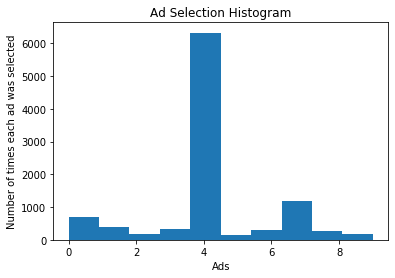

In [8]:
# Visualize results
plt.hist(ads_selected)
plt.title('Ad Selection Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()